### Implementation (v1.0) (need testing)
- last update: 05-04-2024

In [1]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

fig_path = "figures/diatomic/"
fig_save = True

### v2.0

In [2]:
def simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, dimension = 1, mode = 'diatomic', iterations_to_save = None):
    '''
    This function simulate the lattice vibrations of a 1D diatomic lattice.
    
    Parameters:
    -----------
    N : int
        Number of lattice points.
    T : float
        Total time to simulate.
    Nt : int
        Number of time steps.
    V_X_0 : callable
        function that returns the initial velocity and perturbation of the atoms.
    dxdt : callable
        function that describes the time derivative of the perturbation.
    ddXddt : callable
        function that describes the time derivative of the velocity.
    dimension : int
        Dimension of the lattice.
    mode : str
        Type of lattice. It can be 'monoatomic' or 'diatomic'.
    iterations_to_save : list
        List of iterations to save the solution. If None, it saves the initial and final states.
        if 'all', it saves all the states.
        
    Returns:
    --------
    V_X_list : array
        Array with the solution of the lattice vibrations.
    '''
    
    
    dt = T / Nt  # Temporal step size
    
    # Create arrays to store the solution in time
    V_X_list = []

    # creating initial conditions
    V_X = V_X_0(N)
    
    if iterations_to_save is None:
        iterations_to_save = [0, Nt]
    elif iterations_to_save == 'all':
        iterations_to_save = list(range(0, Nt + 1))

    if 0 in iterations_to_save:
        V_X_list.append(np.copy(V_X))
    
    #--------- RK4 time-stepping block ---------#
    for n in tqdm(range(Nt)):
        # Compute spatial derivatives

        k1_X = dXdt(V_X[0][1:-1], V_X[1][1:-1], n * dt)
        k1_V = ddXddt(V_X[0][1:-1], V_X[1][1:-1], n * dt)
        
        k2_X = dXdt(V_X[0][1:-1] + (0.5 * dt * k1_X), V_X[1][1:-1] + (0.5 * dt * k1_V), (n * dt) + (0.5 * dt))
        k2_V = ddXddt(V_X[0][1:-1] + (0.5 * dt * k1_X), V_X[1][1:-1] + (0.5 * dt * k1_V), (n * dt) + (0.5 * dt))
        
        k3_X = dXdt(V_X[0][1:-1] + (0.5 * dt * k2_X), V_X[1][1:-1] + (0.5 * dt * k2_V), (n * dt) + (0.5 * dt))
        k3_V = ddXddt(V_X[0][1:-1] + (0.5 * dt * k2_X), V_X[1][1:-1] + (0.5 * dt * k2_V), (n * dt) + (0.5 * dt))
        
        k4_X = dXdt(V_X[0][1:-1] + (dt * k3_X), V_X[1][1:-1] + (dt * k3_V), (n * dt) + dt)
        k4_V = ddXddt(V_X[0][1:-1] + (dt * k3_X), V_X[1][1:-1] + (dt * k3_V), (n * dt) + dt)
        
        V_X[0][1:-1] = V_X[0][1:-1] + (dt / 6.0) * (k1_X + (2 * k2_X) + (2 * k3_X) + k4_X)
        V_X[1][1:-1] = V_X[1][1:-1] + (dt / 6.0) * (k1_V + (2 * k2_V) + (2 * k3_V) + k4_V)
        
        if (n + 1) in iterations_to_save:
            V_X_list.append(np.copy(V_X))
    #------------------------------------------#
    
    V_X_list = np.array(V_X_list)
    
    return V_X_list

In [31]:
def animate_lattice_vbrations_1D_di(X_list, N, T, Nt, a, frames_per_second = 20, time_scale_to = 10, file_name = 'lattice_vibrations_test.gif'):
    positions = np.linspace(1, N, N) * a
    times = np.linspace(0, T, Nt + 1)

    X_list_with_positions = np.zeros(X_list.shape)
    for i, X in enumerate(X_list):
        X_list_with_positions[i] = X + positions
        
        # making an animation of the lattice vibrations
    import matplotlib.animation as animation

    fig = plt.figure(figsize=(10, 5))
    plt.scatter(positions, np.zeros(N),  s=20, color='b', label='Eqlbm positions', alpha=0.5)
    lines = plt.scatter([],[], s=20, color='r', label='Vibrating atom')

    plt.xlim(np.min(X_list_with_positions) - a, np.max(X_list_with_positions) + a)
    plt.ylim(-1, 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
    y = np.zeros(N)

    # frames_per_second = 20
    time_scale = int(T / time_scale_to)

    total_frames = int(np.floor((frames_per_second * T) / time_scale))
    frame_skip = int(np.floor((Nt / total_frames)))

    print(f'Total frames: {total_frames}')
    print(f'Frame skip: {frame_skip}')

    def animate(i):
        j = (i * frame_skip) + 1
        lines.set_offsets(np.column_stack((X_list_with_positions[j], y)))
        # displaying the time
        plt.title(f'Lattice Vibrations, t = {times[j]:.2f}')
        return lines,

    ani = animation.FuncAnimation(fig, animate, frames=total_frames)

    # gif file
    if fig_save:
        ani.save(fig_path + file_name, writer='pillow', fps=frames_per_second)
        
    plt.show()

In [32]:
# theoretical solution

def theoretical_result_di(N, T, Nt, dimension = 1, mode = 'monoatomic'):
    
    omega_theoretical = np.sqrt((2 * np.abs(k) / mass) * (1 - np.cos(wave_k * a)))
    
    atomic_indices = np.linspace(1, N, N)
    
    X = np.zeros((Nt + 1, N))
    
    for n in range(Nt + 1):
        X[n] = (A) * np.cos(wave_k * atomic_indices * a - (omega_theoretical * n * T / Nt))
        
    return X, omega_theoretical

In [63]:
def lattice_vibrations_analysis(X_list, N, T, Nt, omega_theoretical, trial_name):
    # frequency analysis of the lattice vibrations
    X_list2 = X_list.T # (T, N) -> (N, T)

    # Fourier transform
    X_list_fft = np.fft.fft(X_list2, axis = 1)
    X_list_fft = np.abs(X_list_fft) # get the magnitude of the Fourier transform
    
    # frequencies
    frequencies = np.fft.fftfreq(Nt + 1, T / (Nt))
    
    # only positive frequencies
    frequencies = frequencies[:Nt // 2]
    X_list_fft = X_list_fft[:, :Nt // 2]

    # plotting fourier transform of one of the atoms
    index = N // 2
    plt.figure(figsize=(10,5))
    plt.plot(frequencies, X_list_fft[index])
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title(f'Fourier transform of the lattice vibrations of {index + 1} atom')
    plt.grid()
    if fig_save:
        plt.savefig(fig_path + f'lattice_vibrations_fourier_{trial_name}.png')
    plt.show()


    # finding the frequency with the maximum amplitude for each atom
    max_amplitude = np.max(X_list_fft, axis = 1)
    max_amplitude_index = np.argmax(X_list_fft, axis = 1)
    max_amplitude_frequency = frequencies[max_amplitude_index]

    # plotting the frequencies
    plt.figure(figsize=(10,5))
    plt.plot(np.linspace(1, N, N), max_amplitude_frequency, 'o')
    plt.xlabel('Atom index')
    plt.ylabel('Frequency')
    plt.title('Frequency of the lattice vibrations')
    plt.hlines(omega_theoretical / (2 * np.pi), 0, N, color='r', label='Theoretical frequency')
    plt.grid()
    plt.legend()
    if fig_save:
        plt.savefig(fig_path + f'lattice_vibrations_frequency_{trial_name}.png')
        
    plt.show()
    
    return max_amplitude_frequency


In [34]:
# new 4

N = 10
a = 1 # Lattice spacing
T = 30
Nt = 600
mass1 = 1
mass2 = 2
k = 1
wave_k = np.pi / a
A = a / 8
B = a / 12
trial_name = 'trial6'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    # V_X[0] = np.ones(N) * (A)
    V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = np.zeroslike(X[1:-1])
    try: dXdt_val[0::2] = - (k / mass2) * ((2*X[1:-1:2]) - X[:-2:2] - X[2::2])
    except: print("Reconfigure the equations if any errors pop up..")
    try: dXdt_val[1::2] = - (k / mass2) * ((2*X[2:-1:2]) - X[1:-2:2] - X[3::2])
    except: print("Reconfigure the equations if any errors pop up..")
    return dXdt_val

def dXdt(X, V, t):
    return V

In [35]:
X_list_theoretical, omega_theoretical = theoretical_result(N, T, Nt)
print(X_list_theoretical.shape)

(601, 10)


Total frames: 200
Frame skip: 3


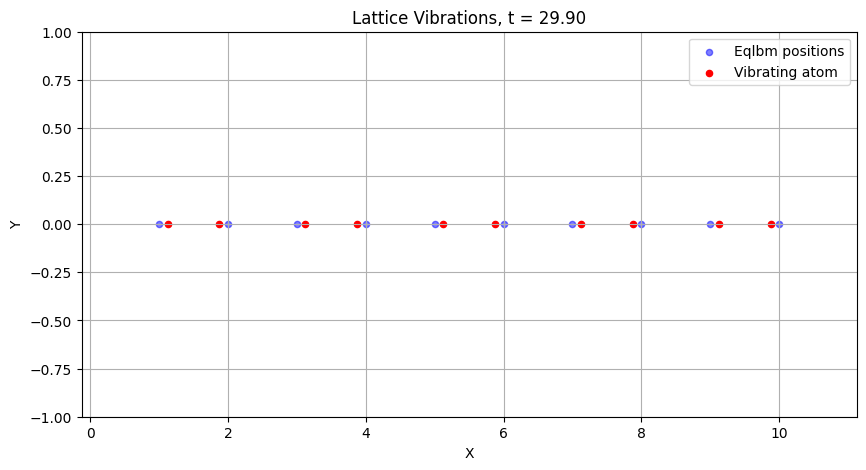

In [36]:
animate_lattice_vbrations_1D(X_list_theoretical, N, T, Nt, a, frames_per_second = 20, time_scale_to = 10, file_name=f'lattice_vibrations_theoretical_{trial_name}.gif')

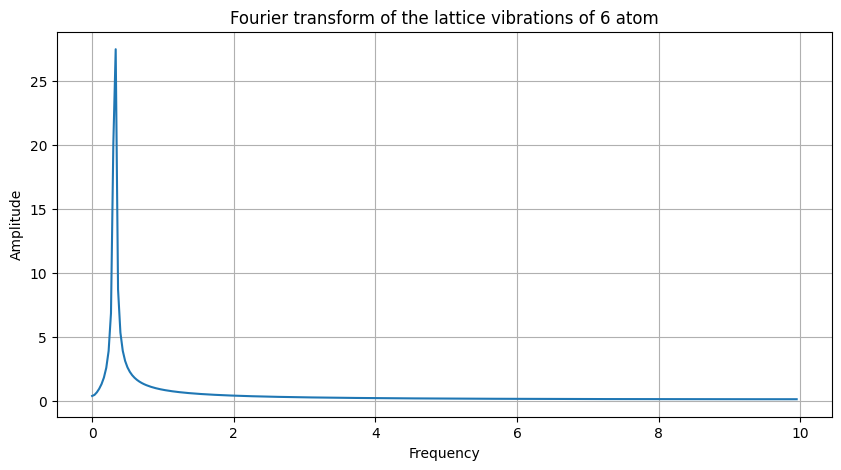

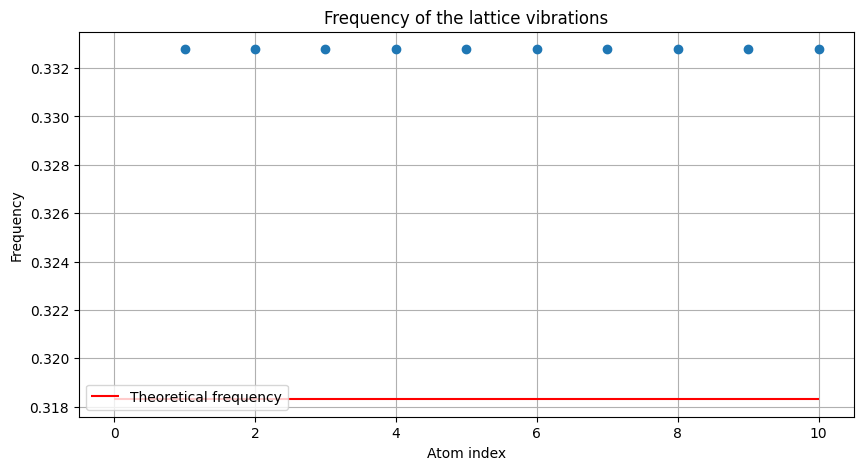

In [64]:
freq_theoretical_fft = lattice_vibrations_analysis(X_list_theoretical, N, T, Nt, omega_theoretical, trial_name+'theoretical')

### Implementation

In [37]:
V_X_list = simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, iterations_to_save = 'all')
print(V_X_list.shape)

100%|██████████| 600/600 [00:00<00:00, 6652.05it/s]

(601, 2, 10)


In [38]:
X_list = V_X_list[:,0]
print(X_list.shape)

(601, 10)


Total frames: 200
Frame skip: 3


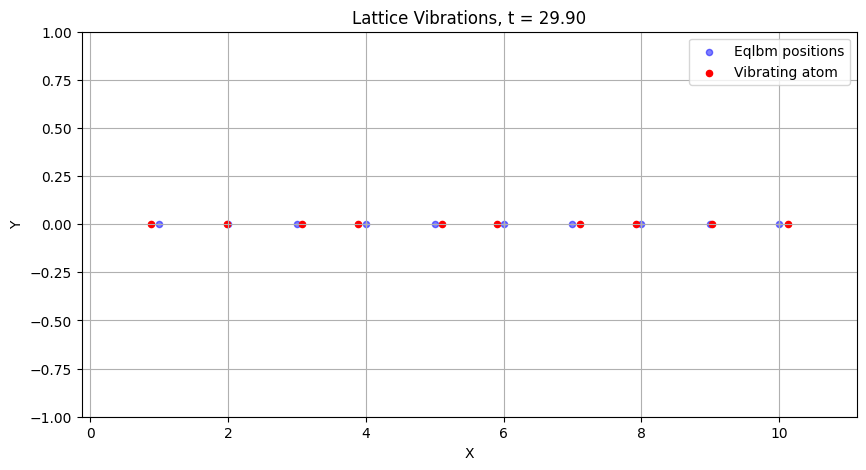

In [39]:

animate_lattice_vbrations_1D(X_list, N, T, Nt, a, frames_per_second = 20, time_scale_to = 10, file_name=f'lattice_vibrations_{trial_name}.gif')

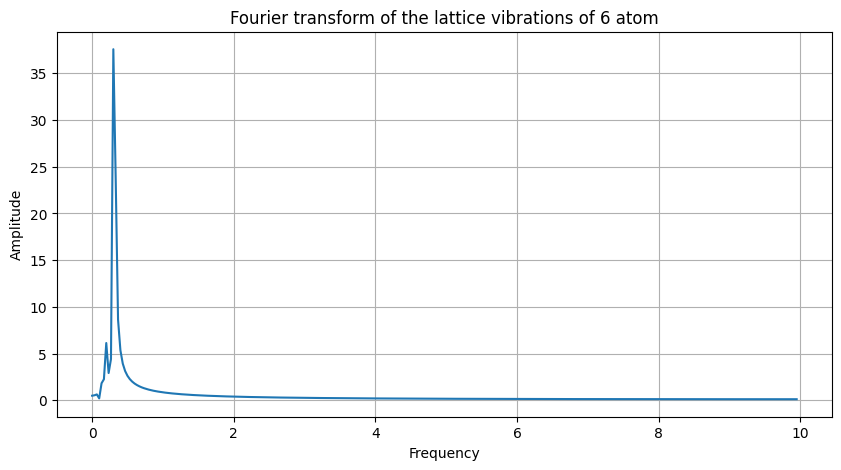

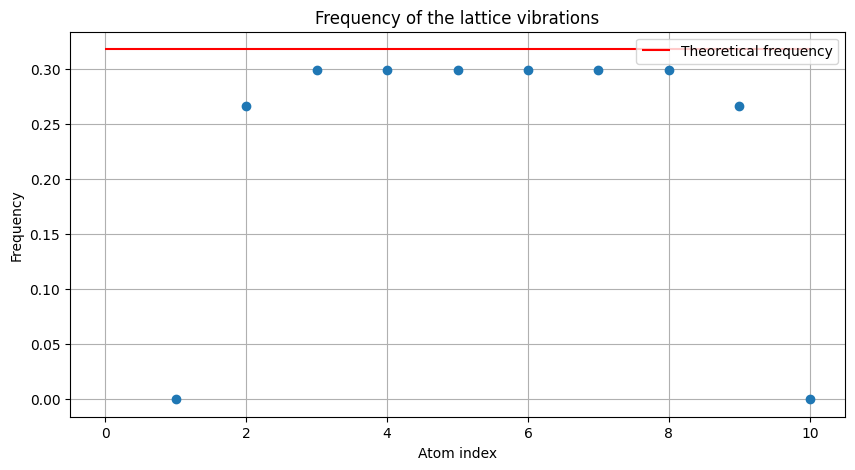

In [66]:
freq_obs_fft = lattice_vibrations_analysis(X_list, N, T, Nt, omega_theoretical, trial_name)

### Storage of trial settings done

In [41]:
############################################

N = 10
a = 1 # Lattice spacing
T = 30
Nt = 600
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial5'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0] = np.ones(N) * (A)
    V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    # V_X[0][0] = 0
    # V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V


############################################

N = 10
a = 1 # Lattice spacing
T = 30
Nt = 600
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial4'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0] = np.ones(N) * (A)
    V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V


############################################
# new 3 - old model (not used in the report)

N = 10
a = 1 # Lattice spacing
T = 30
Nt = 600
mass = 1
k = 1

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0] = np.ones(N) * (a / 8)
    V_X[0][0] = 0
    V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity
    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V
    
############################################



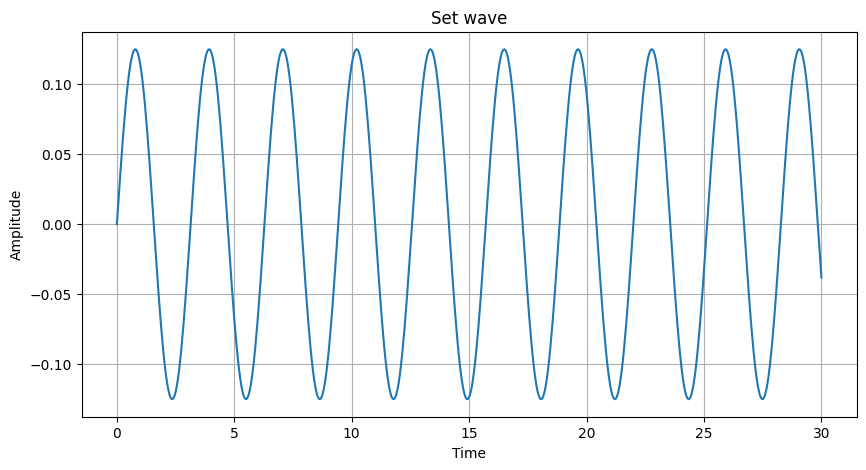

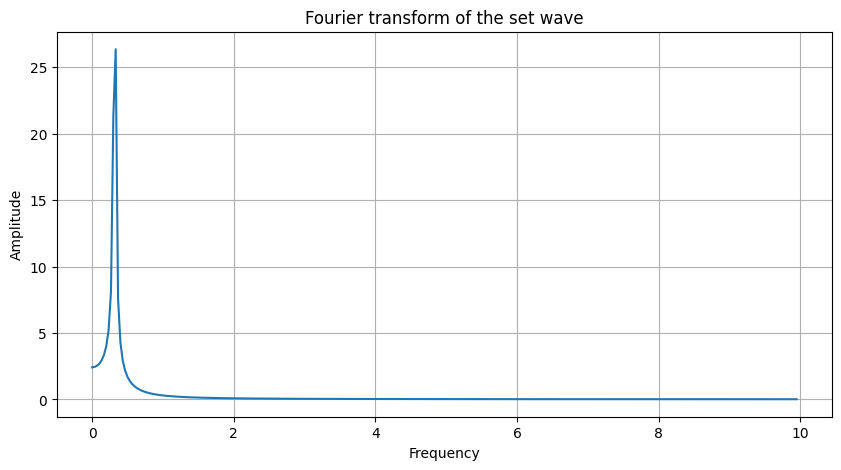

Maximum amplitude frequency: 0.33277870216306155
Set omega: 2
Maximum amplitude omega 2 pi f: 2.09091025197324


In [59]:
set_omega = 2 # Hz
set_amplitude = 1

set_wave = A * np.cos(wave_k * 4 * a - (set_omega * np.linspace(0, T, Nt + 1))) # 4th atom
set_wave = A * np.sin((set_omega * np.linspace(0, T, Nt + 1))) # 4th atom


plt.figure(figsize=(10,5))
plt.plot(np.linspace(0, T, Nt + 1), set_wave)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Set wave')
plt.grid()
# if fig_save:
#     plt.savefig(fig_path + 'set_wave.png')
plt.show()

# fft of the set wave
set_wave_fft = np.fft.fft(set_wave)
set_wave_fft = np.abs(set_wave_fft) # get the magnitude of the Fourier transform

# frequencies
frequencies = np.fft.fftfreq(Nt + 1, T / (Nt))

# only positive frequencies
frequencies = frequencies[:Nt // 2]
set_wave_fft = set_wave_fft[:Nt // 2]

# plotting fourier transform of the set wave
plt.figure(figsize=(10,5))
plt.plot(frequencies, set_wave_fft)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier transform of the set wave')
plt.grid()
# if fig_save:
#     plt.savefig(fig_path + 'set_wave_fourier.png')
plt.show()

# finding the frequency with the maximum amplitude for the set wave
max_amplitude = np.max(set_wave_fft)
max_amplitude_index = np.argmax(set_wave_fft)
max_amplitude_frequency = frequencies[max_amplitude_index]

print(f'Maximum amplitude frequency: {max_amplitude_frequency}')
print(f'Set omega: {set_omega}')

print(f'Maximum amplitude omega 2 pi f: {2 * np.pi * max_amplitude_frequency}')